In [72]:
import seaborn as sns         
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import ks_2samp
from scipy.spatial import distance
from sklearn.manifold import MDS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import math
import time
import pickle


In [2]:
# set path for reading files
path="GPS2/"

In [11]:
#read all files
classes= [ name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name)) ]

max_d=0
min_d=99999
min_of_max_d=99999
gps_dict={}
class_dict={}
class_values=[]
gps_files=[]
for c in classes:
    c_path=os.path.join(path,c)
    files=os.listdir(c_path)
    for f in files:
        if(f.endswith(".csv")):
            df=pd.read_csv(os.path.join(c_path,f),index_col=None, header=None)
            # df = df.reset_index(level=0)
            gps=[]
            for index, row in df.iterrows(): 
                gps.append(row.to_list())
                dis= np.linalg.norm(row.to_list())
                if dis>max_d:
                    max_d=dis
                if dis<min_d:
                    min_d=dis
    
            gps_dict[os.path.join(c_path,f)]=gps
            class_dict[os.path.join(c_path,f)]=classes.index(c)
            gps_files.append(os.path.join(c_path,f))
            if(min_of_max_d>max_d):
                min_of_max_d=max_d

splitting into m regions

In [12]:
def green(p1,p2):
    return np.dot(np.array(p1),np.array(p2))

In [13]:
#calculate histogram for a given gps and m
def g2_distribution(GPS,m):
#     split region into m+1 regions
    m=m+1
    distances = [np.linalg.norm(v) for v in GPS]
    delta = (min_of_max_d-min_d) / m
    gps_reg=[[] for i in range(m)]
    for d in range(len(distances)):
        value=int(distances[d] - min_d-(0.01*distances[d])) // delta
        if value>m-1:
            index=m-1
        else:
            index=value
            
        gps_reg[int(index)].append(GPS[d])

    hist=[]
    for i in range(m):
        h1=[];
        for j in range(i+1,m):
            for p1 in range(int(len(gps_reg[i])/10)):
                for p2 in range(int(len(gps_reg[j])/10)):
                    point1=random.choice(gps_reg[i])
                    point2=random.choice(gps_reg[j])
                    h1.append(green(point1,point2))

            hist.append(h1)

            # plt.hist(h1)
            # sns.distplot(h1, hist=False, label="test")
            # plt.show()
    return hist





In [ ]:

def compare(h1,h2):
    l2=0
    a=plt.hist(h1,bins=100,density=True)
    b=plt.hist(h2,bins=100,density=True)
    for i in range(len(a[0])):
#         l2+=(a[0][i]-b[0][i])**2
        l2=distance.minkowski(a[0],b[0],2)
    return l2

In [14]:

c_path=os.path.join(path,classes[0])
files=os.listdir(c_path)
hist=[]
for f in files:
#     print(gps_dict[os.path.join(c_path,f)])
    h=g2_distribution(gps_dict[os.path.join(c_path,f)],1)
    hist.append(h)
    print(f)
#     print(h)
    sns.displot(h[0],label="test",kind="kde")
plt.show()

In [15]:
len(gps_files)

44

In [16]:
#find all histograms
g2_his_list=[]
for i in range(len(gps_files)):
#     print(i)
    g2_his_list.append(g2_distribution(gps_dict[gps_files[i]],1))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [101]:
classes[1]

'elephant-gallop'

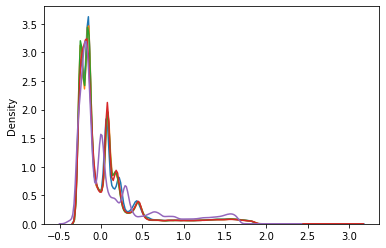

i- 0
i- 1
i- 2
i- 3
i- 4
i- 5
i- 6
i- 7
i- 8
i- 9
i- 10
i- 11
i- 12
i- 13
i- 14
i- 15
i- 16
i- 17
i- 18
i- 19
i- 20
i- 21
i- 22
i- 23
i- 24
i- 25
i- 26
i- 27
i- 28
i- 29
i- 30
i- 31
i- 32
i- 33
i- 34
i- 35
i- 36
i- 37
i- 38
i- 39
i- 40
i- 41
i- 42
i- 43
3249.7057988643646


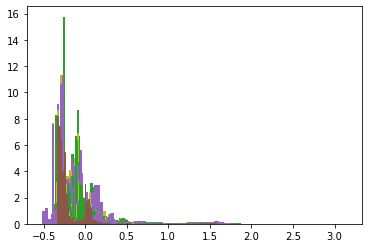

In [26]:
start = time.time()

k2_matrix=[[0 for i in range(len(gps_files))]for i in range(len(gps_files))]
bin_matrix=[[0 for i in range(len(gps_files))]for i in range(len(gps_files))]
mink_matrix=[[0 for i in range(len(gps_files))]for i in range(len(gps_files))]
for i in range(len(gps_files)):
    print("i-",i)

    for j in range(i+1,len(gps_files)):
#         print(j)
        d1=0
        d2=0
        h1=g2_his_list[i]
        h2=g2_his_list[j]
        for k in range(len(h1)):
            if(len(h1[k])>0 and len(h2[k])>0):
                d1+=ks_2samp(h1[k],h2[k])[0]
                d2+=compare(h1[k],h2[k])
        k2_matrix[i][j]=d1
        k2_matrix[j][i]=d1
        mink_matrix[i][j]=d2
        mink_matrix[j][i]=d2
        
    
#         bin2.append(compare(h1[0],h2[0]))
#         mink.append(mink)
end=time.time()
print(end-start)

In [58]:
with open('class_list.txt', 'w') as files:
    for i in range(len(label)):
        files.write(label[i]+"/"+gps_files[i]+"\n")

In [82]:
def plot_mds(x, y, labels):
    fig, ax = plt.subplots(figsize=(10,10))
    for c in classes:
        class_label=[i for i in range(len(labels)) if labels[i]==c]
        ax.scatter(x[class_label], y[class_label], label=c)
    ax.legend()
    plt.show()

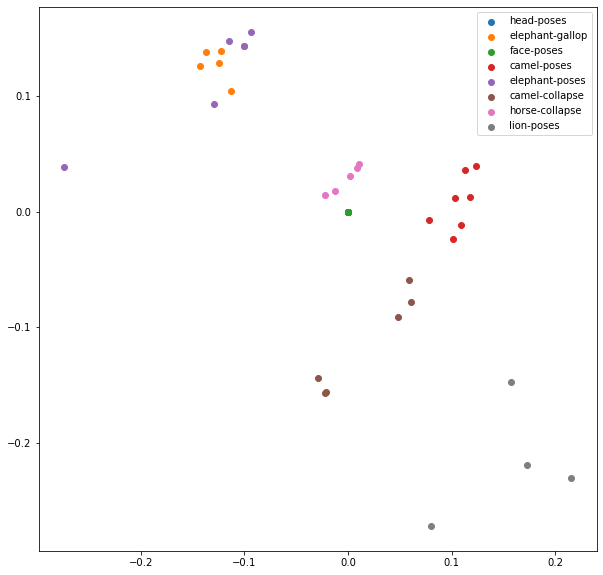

In [83]:
model = MDS(dissimilarity='precomputed')
coords = embedder.fit_transform(k2_matrix)
label=[classes[class_dict[f]] for f in gps_files]
plot_mds(coords[:, 0], coords[:, 1], label)

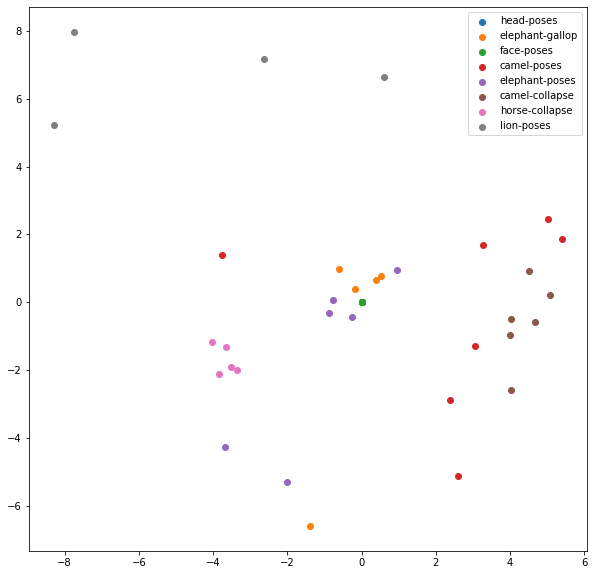

In [84]:
model = MDS(dissimilarity='precomputed')
coords = model.fit_transform(mink_matrix)
label=[classes[class_dict[f]] for f in gps_files]
plot_mds(coords[:, 0], coords[:, 1], label)

with open('mds_gps_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [75]:
X = [c for c in coords]
y = label

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

neigh = KNeighborsClassifier()
 
neigh.fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model with GPS is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model with GPS is 0.3333333333333333


array(['camel-collapse', 'elephant-gallop', 'face-poses', 'face-poses',
       'horse-collapse', 'camel-collapse', 'camel-collapse',
       'elephant-gallop', 'elephant-poses'], dtype='<U15')

In [ ]:
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

https://nbviewer.org/github/empet/Hollow-mask-illusion/blob/main/Hollow-Mask-illusion-Animation.ipynb

In [ ]:
import meshio
import numpy as np
from numpy import pi, sin, cos
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [ ]:
msh = meshio.read("/content/cat-01.obj") #https://raw.githubusercontent.com/empet/Datasets/master/Meshes/face-mesh.obj
verts = msh.points
middle = np.max(verts, axis=0) + np.min(verts, axis=0)/2
verts = verts - middle
I, J, K =  msh.cells_dict["triangle"].T
x, y, z = verts.T

In [ ]:
fig= make_subplots(rows=1, cols=3, 
                   horizontal_spacing=0.015,
                   specs=[[{'type': 'scene'},  {'type': 'scene'},{'type': 'scene'}]])

colorscale = [[0, 'rgb(250,250,250)'], 
              [1, 'rgb(250,250,250)']]
fig.add_trace(go.Mesh3d(x=x, y=y, z=z, 
                          i=I, j=J, k=K, 
                          intensity=z, 
                          colorscale =colorscale,
                          showscale=False,
                         ), 1, 1)
fig.add_trace(go.Mesh3d(x=x, y=y, z=z, 
                          i=I, j=J, k=K, 
                          intensity=z, 
                          colorscale =colorscale,
                          showscale=False,
                         ), 1, 2)
fig.add_trace(go.Mesh3d(x=x, y=y, z=z, 
                          i=I, j=J, k=K, 
                          intensity=z, 
                          colorscale =colorscale,
                          showscale=False,
                         ), 1, 3)
axis_prop =dict(visible=False, autorange=False)
scenes = dict(xaxis=dict(range=[-1, 1], **axis_prop),
              yaxis=dict(range=[-1, 1], **axis_prop),
              zaxis=dict(range=[-1, 1], **axis_prop),
              camera_eye=dict(x=-1.85, y=-1.85, z=0.65),
              aspectratio=dict(x=3, y=3, z=3))

fig.update_layout(title_text="Hollow mask illusion", title_x=0.5, title_y=0.95,
                  font_size=16, font_color="white",
                  width=800, height=400, autosize=True, 
                  margin=dict(t=2, r=2, b=2, l=2),
                  paper_bgcolor='black',
                  scene= scenes, scene2=scenes,scene3=scenes)
fig.show()